In [ ]:
"""
Python可视化matplotlib&seborn15-聚类热图clustermap
原创 pythonic生物人 pythonic生物人 2020-08-01 14:40


聚类热图可以简单理解为，使用距离算法将距离相近的东西成簇聚为一类。
本篇使用python中seaborn.clustermap绘制聚类热图（clustermap）。

1、成品聚类热图（clustermap）展示
2、绘图数据集准备 

3、 seaborn.clustermap绘制聚类热图（clustermap）
3.0 聚类热图函数seaborn.clustermap语法
3.1 默认参数绘图
3.2 pivot_kws：辅助选择data中某一部分数据绘图
3.3 method：聚类算法
3.4 metric：簇之间距离选择 
3.5 figsize：热图的宽和高设置 
3.6 cbar_kws：图例设置
3.7 row_cluster、col_cluster：行列聚类开关
3.8 row_colors: y轴方向绘制分类色条 
3.9 col_colors: x轴方向绘制分类色条 
3.10  cbar_pos：图例位置、宽、高设置
3.11 tree_kws：各个簇之间连线特性设置 
3.12 cmap：热图填充色colormap设置 
3.13 annot、annot_kws：显示文本、文本属性设置 
3.14 其它参数设置

4、seaborn.clustermap所有参数详解代码
"""
import warnings
warnings.filterwarnings("ignore")

In [1]:
"""
1、成品聚类热图（clustermap）展示
请浏览微信帖子查看。 或查看以下图片文件（和代码同目录）
聚类热图.png

2、绘图数据集准备
依旧使用sklearn中鸢尾花iris数据集，数据集详细介绍请戳：鸢尾花iris数据集详细介绍
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import palettable

plt.rcParams['font.sans-serif']=['SimHei']  # 用于显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用于显示中文

from sklearn import datasets 
iris=datasets.load_iris()
x, y = iris.data, iris.target
pd_iris = pd.DataFrame(np.hstack((x, y.reshape(150, 1))),columns=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)','class'] )
#查看数据集前五行
pd_iris.head()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [2]:
"""
数据集简单统计
"""
pd_iris.describe()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Figure size 1280x960 with 0 Axes>

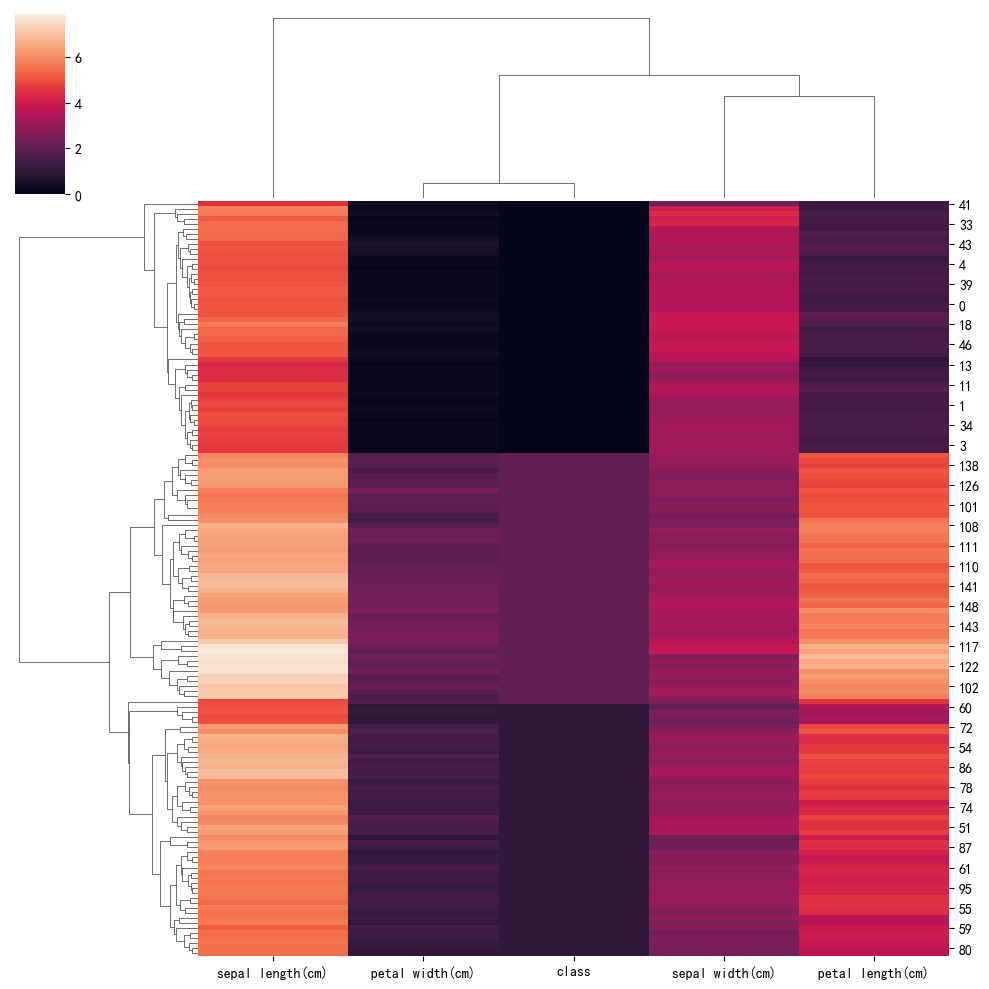

In [5]:
"""
3.0 聚类热图函数seaborn.clustermap语法   
seaborn.clustermap(data, pivot_kws=None, method='average', metric='euclidean', z_score=None, standard_scale=None, figsize=(10, 10), cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, mask=None, dendrogram_ratio=0.2, colors_ratio=0.03, cbar_pos=(0.02, 0.8, 0.05, 0.18), tree_kws=None, **kwargs)
3.1 默认参数绘图)
"""
plt.figure(dpi=200)
sns.clustermap(data=pd_iris,#仅仅需传入绘图数据集
               )

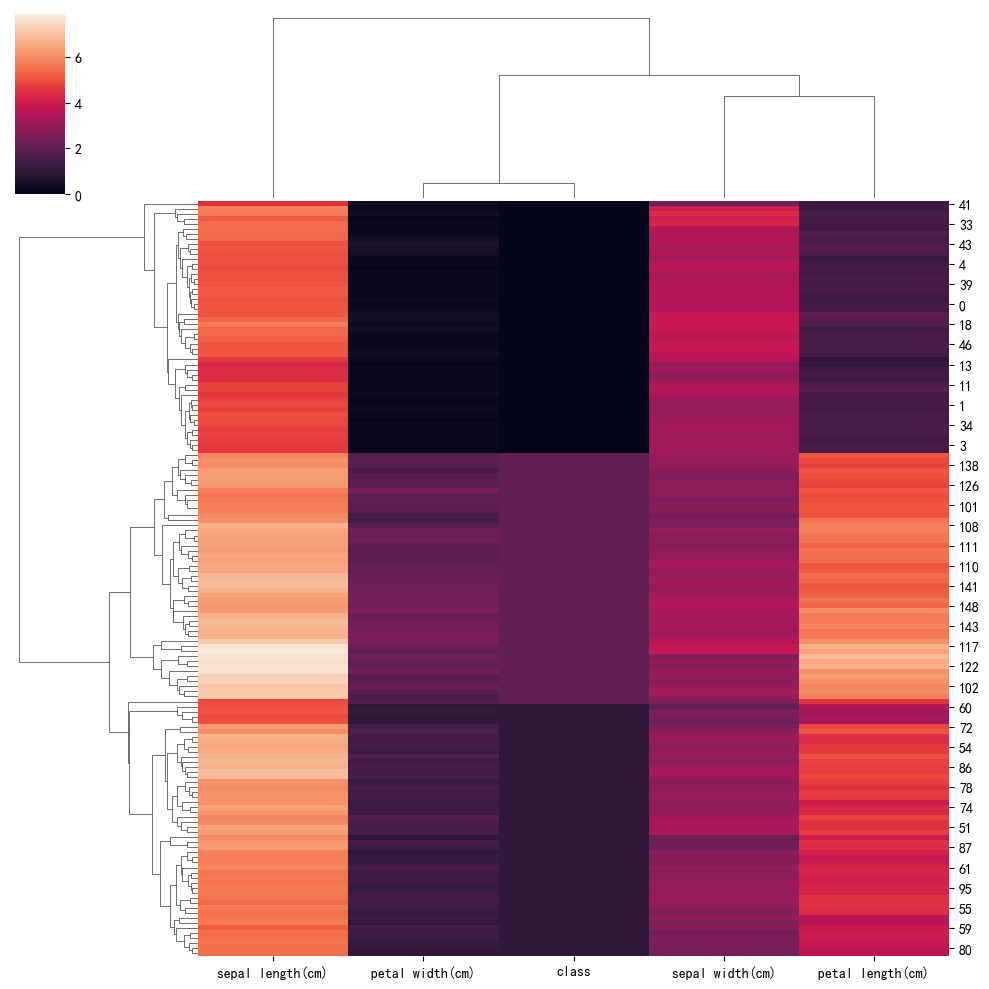

In [6]:
"""
3.2 pivot_kws：辅助选择data中某一部分数据绘图
改参数使用可参考：https://cmdlinetips.com/2020/01/heatmaps-with-seaborns-clustermap/
3.3 method：聚类算法
默认为为average算法，可选’single’，’complete’ ,’weighted’,’centroid’,’median’；
各算法区别请参考scipy中：scipy.cluster.hierarchy.linkage
"""
sns.clustermap(data=pd_iris,
               method='average',#'average'算法
              )

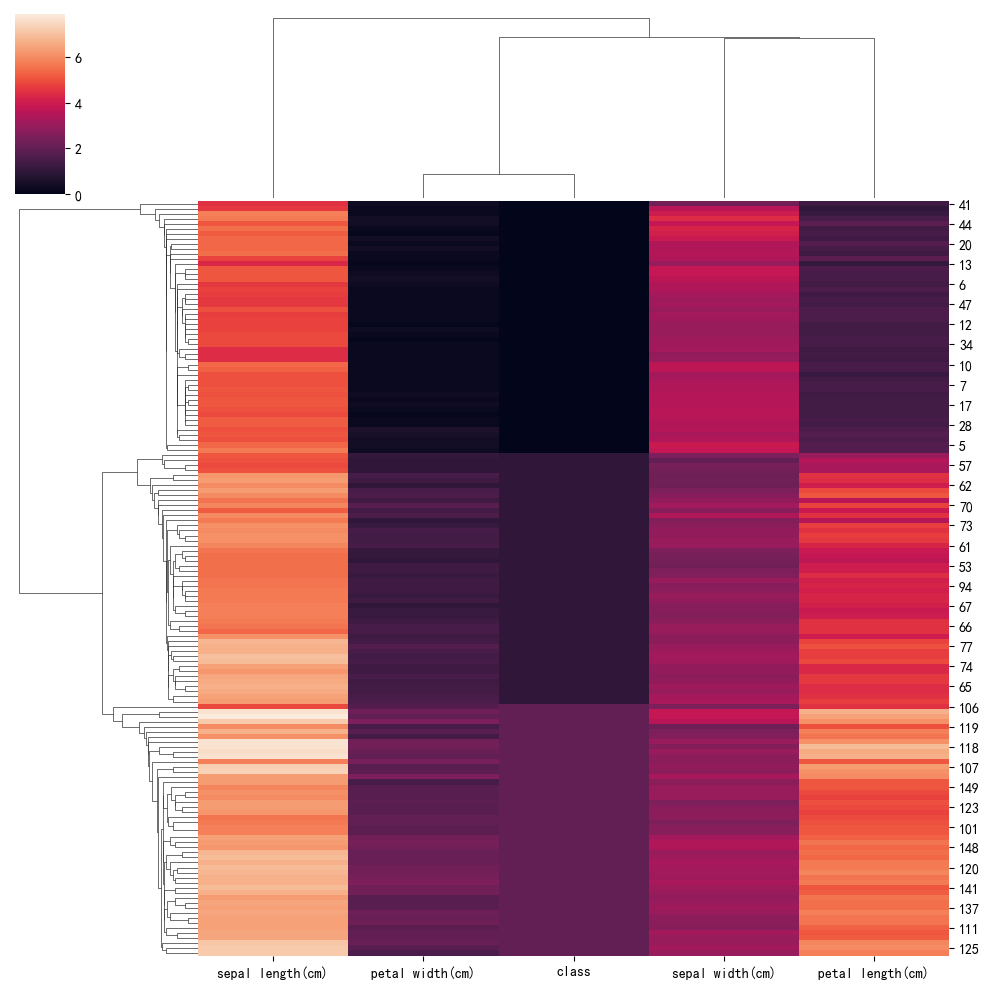

In [7]:
#注意观察y轴方向值的变化
sns.clustermap(data=pd_iris,
               method='single',#'single'算法
              )


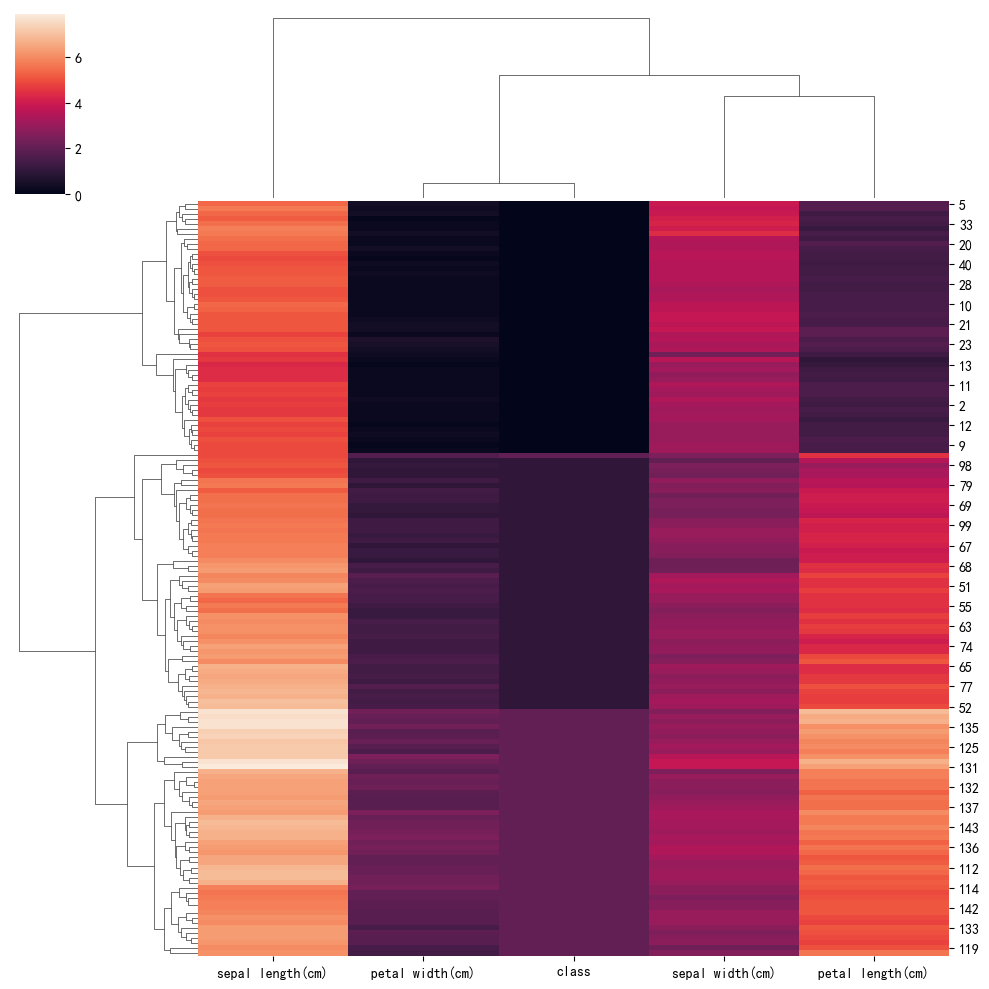

In [8]:
sns.clustermap(data=pd_iris,
               method='weighted',#'weighted'算法
              )

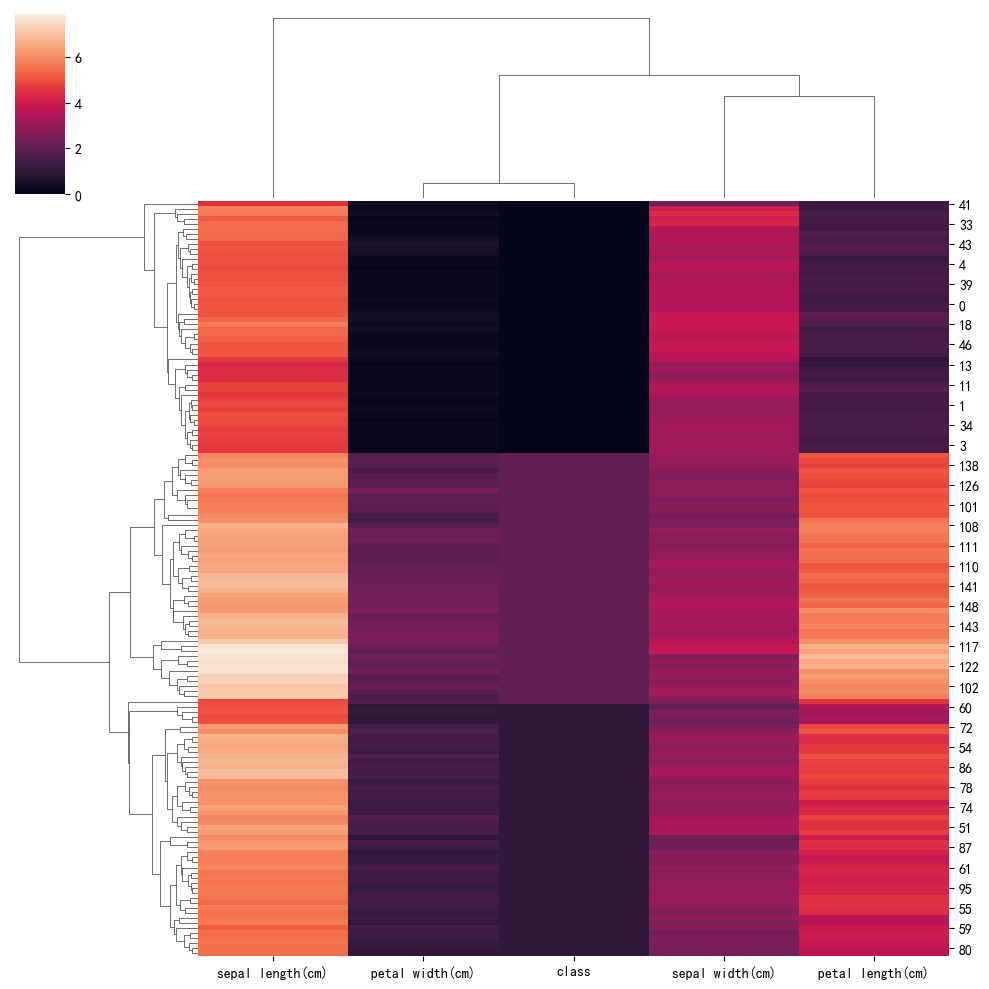

In [9]:
"""
3.4 metric：簇之间距离选择
默认为欧式距离euclidean，可选距离：‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, 
‘cosine’, ‘dice’,‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, 
‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, 
‘sokalsneath’, ‘sqeuclidean’, ‘yule’.各个距离之间区别，scipy中有详细介绍：scipy.spatial.distance.pdist
"""
sns.clustermap(data=pd_iris,
               metric='euclidean',#欧式距离'euclidean'
              )

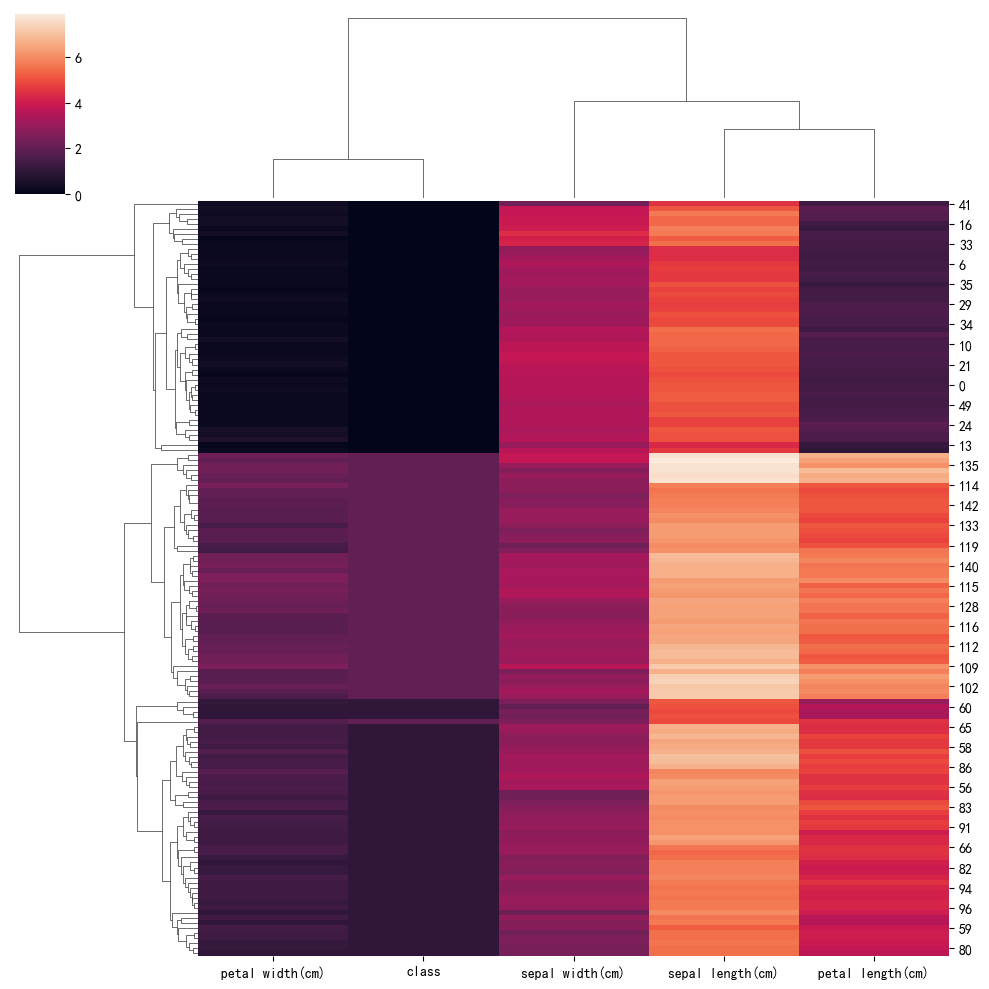

In [10]:
#注意右侧值的变化
sns.clustermap(data=pd_iris,
               metric='braycurtis',#Bray-Curtis距离
              )

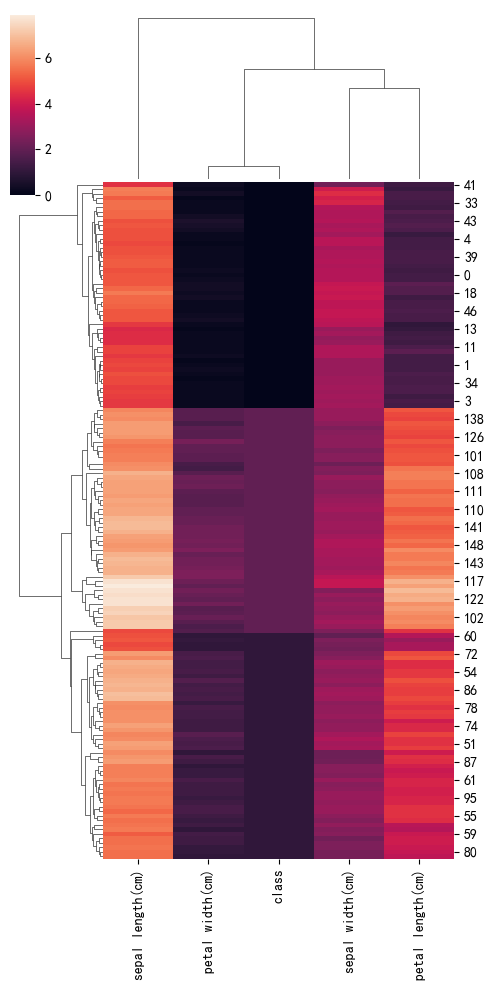

In [11]:
"""
3.5 figsize：热图的宽和高设置
"""
sns.clustermap(data=pd_iris,
               figsize=(5, 10),            
              )

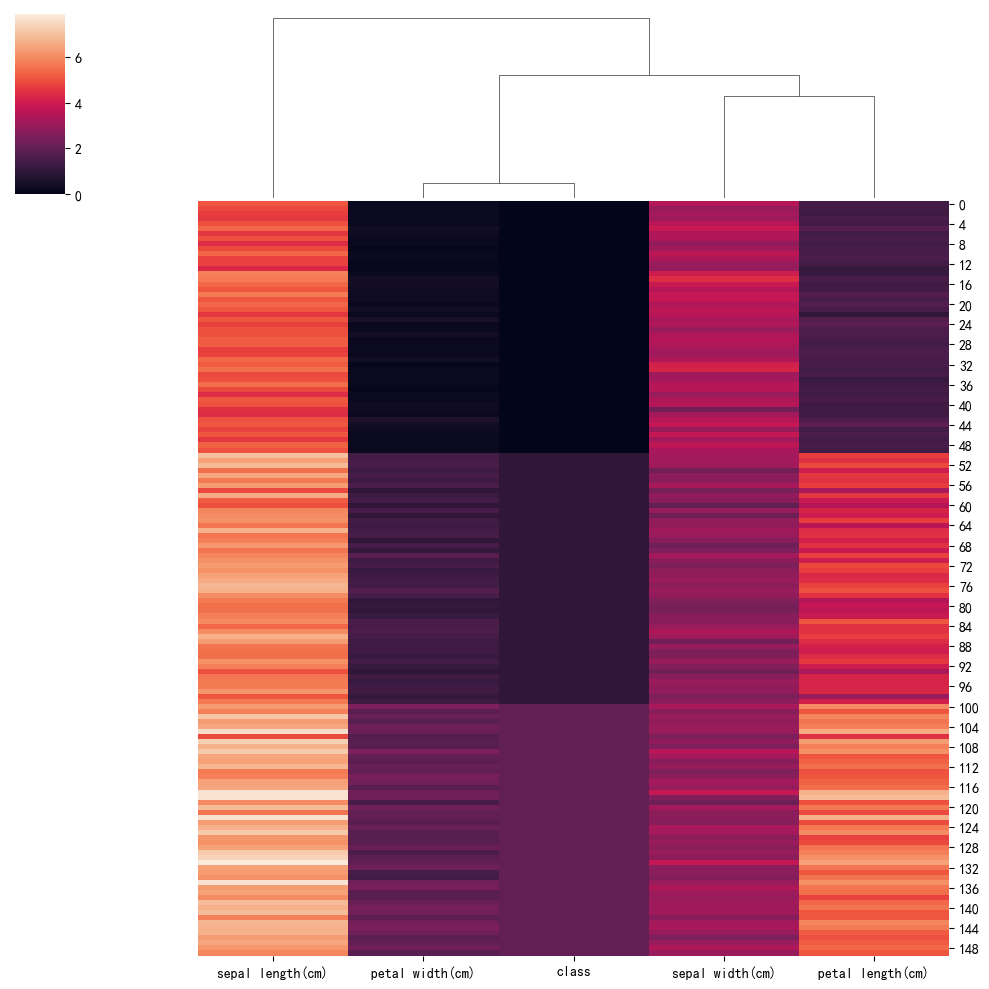

In [12]:
"""
3.6 cbar_kws：图例设置
方法类似普通heatmap，不赘述，参考： 热图图例详细设置
3.7 row_cluster、col_cluster：行列聚类开关
"""
sns.clustermap(data=pd_iris,
               row_cluster=False, #行方向不聚类
               col_cluster=True, #列方向聚类
               
              )

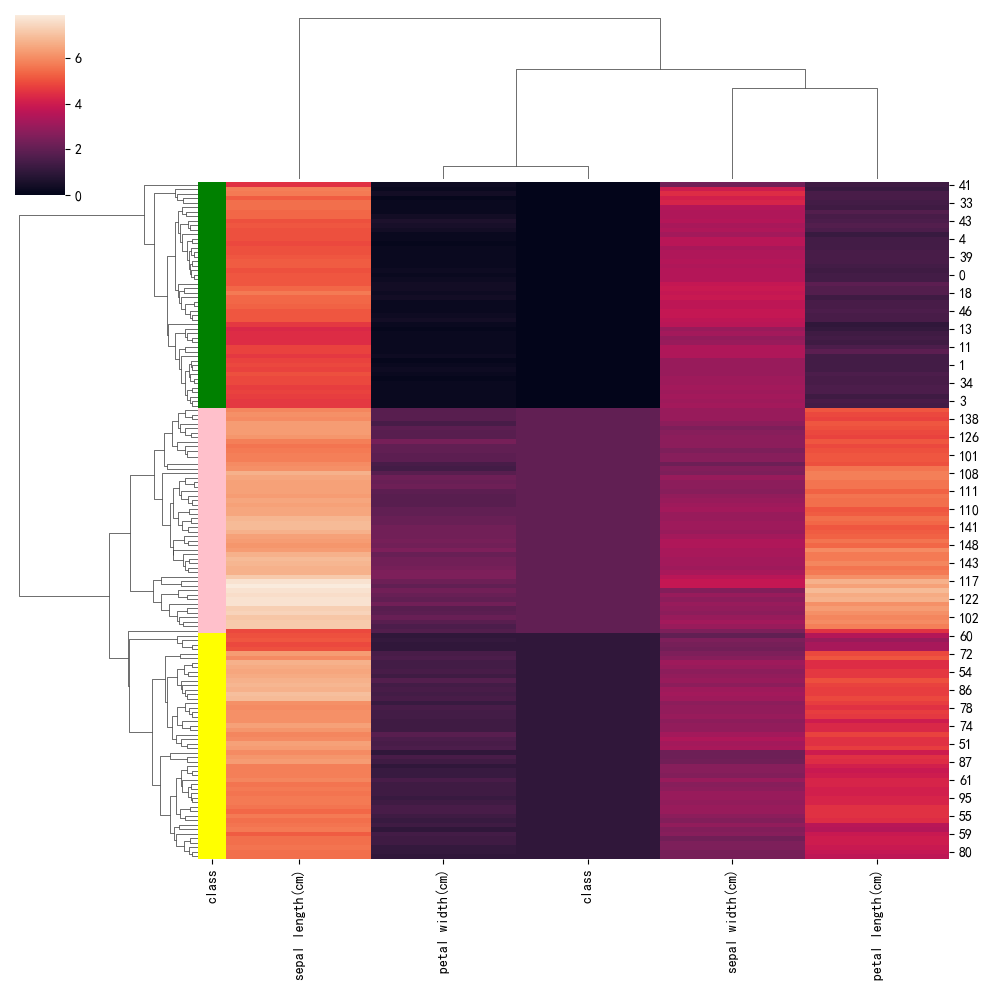

In [13]:
"""
3.8 row_colors: y轴方向绘制分类色条
"""
#左侧颜色条
row_c = dict(zip(pd_iris['class'].unique(), ['green','yellow','pink']))
sns.clustermap(data=pd_iris,
               row_colors=pd_iris['class'].map(row_c), #行方向聚类用颜色区分不同类               
              )

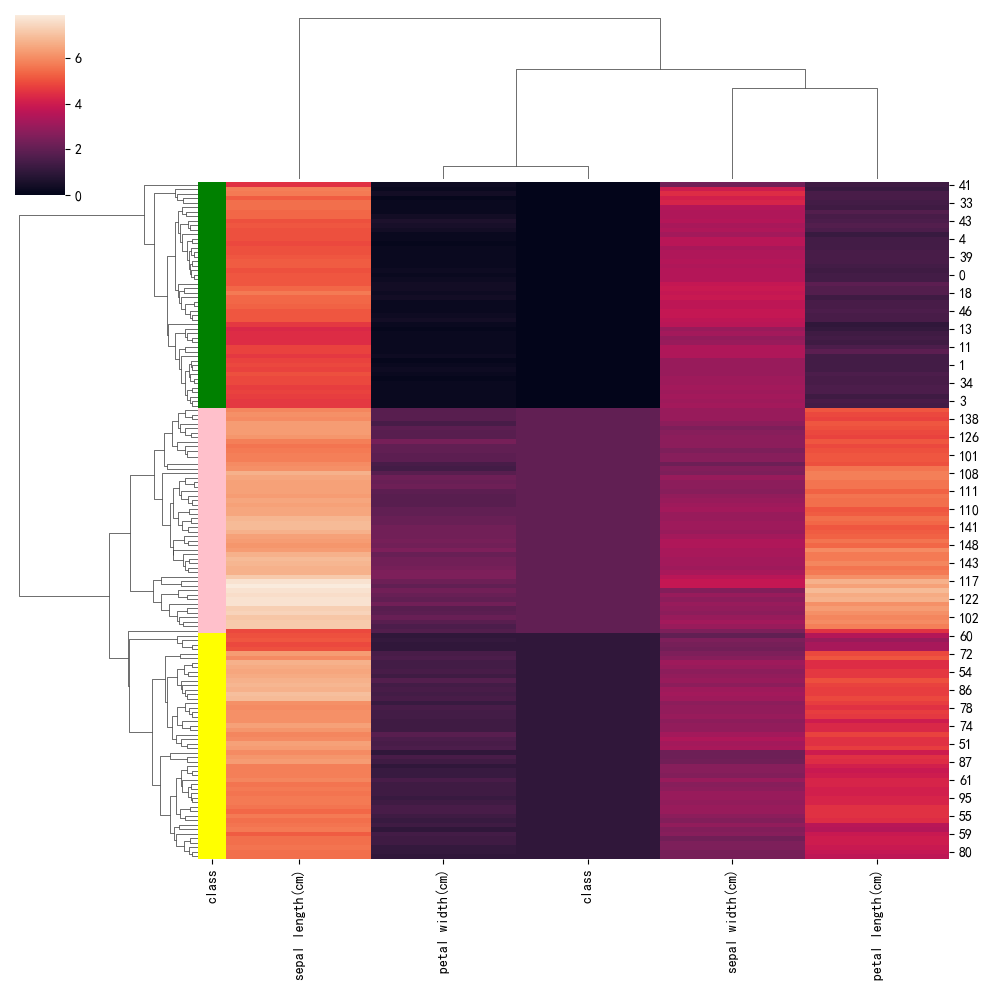

In [14]:
"""
3.8 row_colors: y轴方向绘制分类色条
"""
#左侧颜色条
row_c = dict(zip(pd_iris['class'].unique(), ['green','yellow','pink']))
sns.clustermap(data=pd_iris,
               row_colors=pd_iris['class'].map(row_c), #行方向聚类用颜色区分不同类               
              )

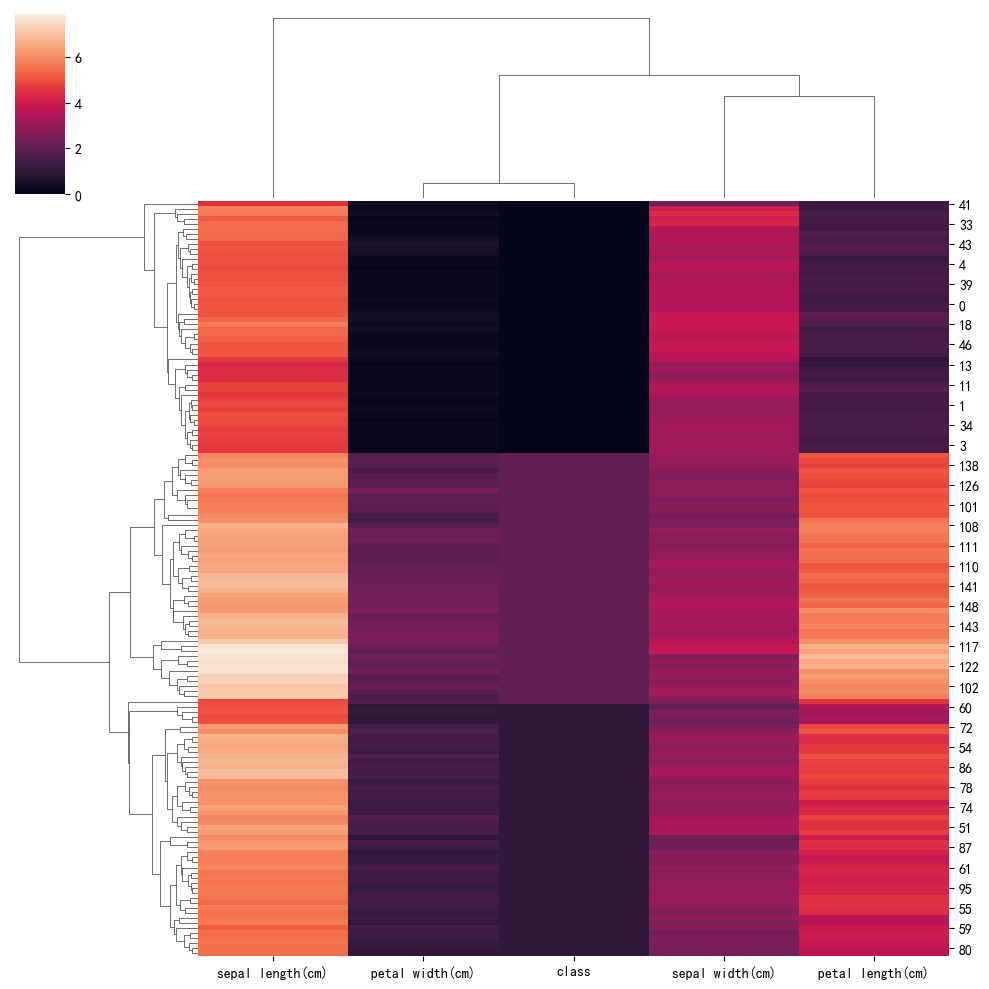

In [15]:
"""
3.9 col_colors: x轴方向绘制分类色条
3.10  cbar_pos：图例位置、宽、高设置
"""
sns.clustermap(data=pd_iris,
               cbar_pos=(0.02, 0.8, 0.05, 0.18), #(left, bottom, width, height)
               
              )

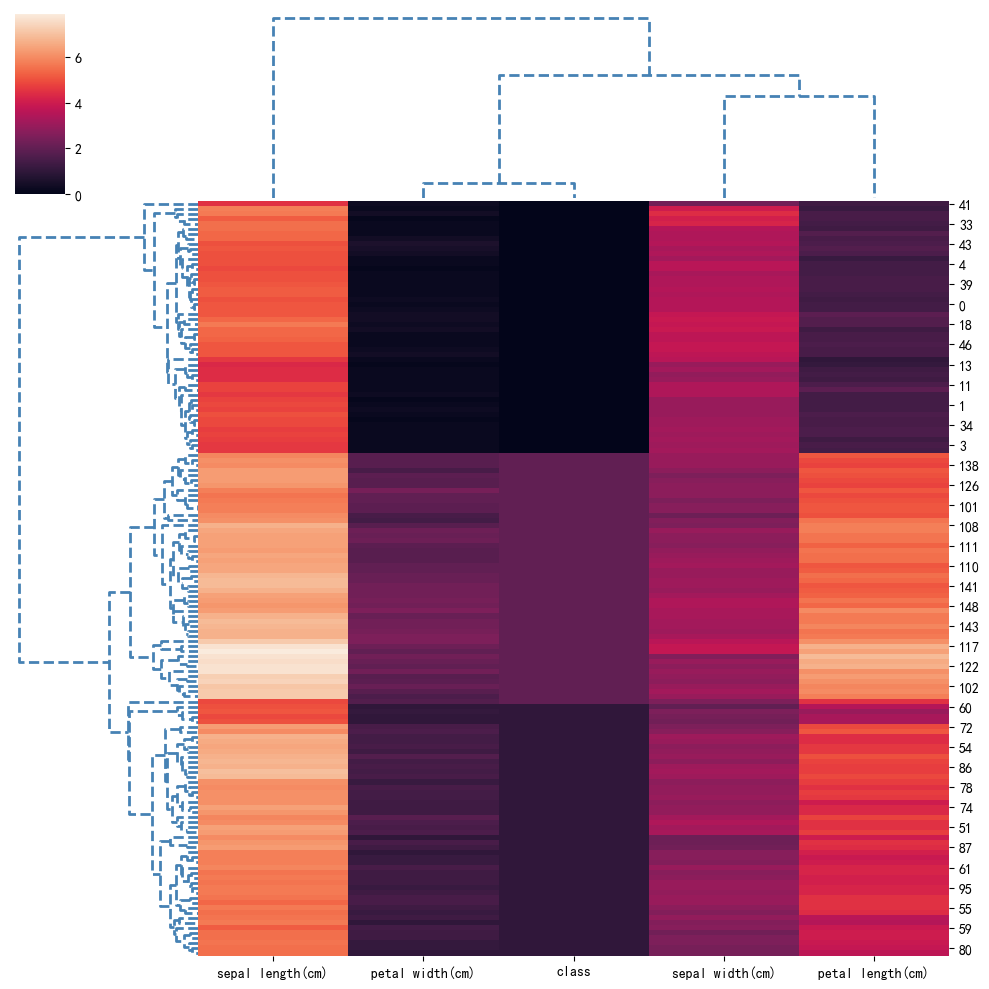

In [16]:
"""
3.11 tree_kws：各个簇之间连线特性设置
线型设置参考：python中line属性设置
"""
sns.clustermap(data=pd_iris,
               tree_kws={'linestyles':'dashed',#线型
                        'colors':'steelblue',#线色
                        'linewidths':2},#线宽 
               
              )

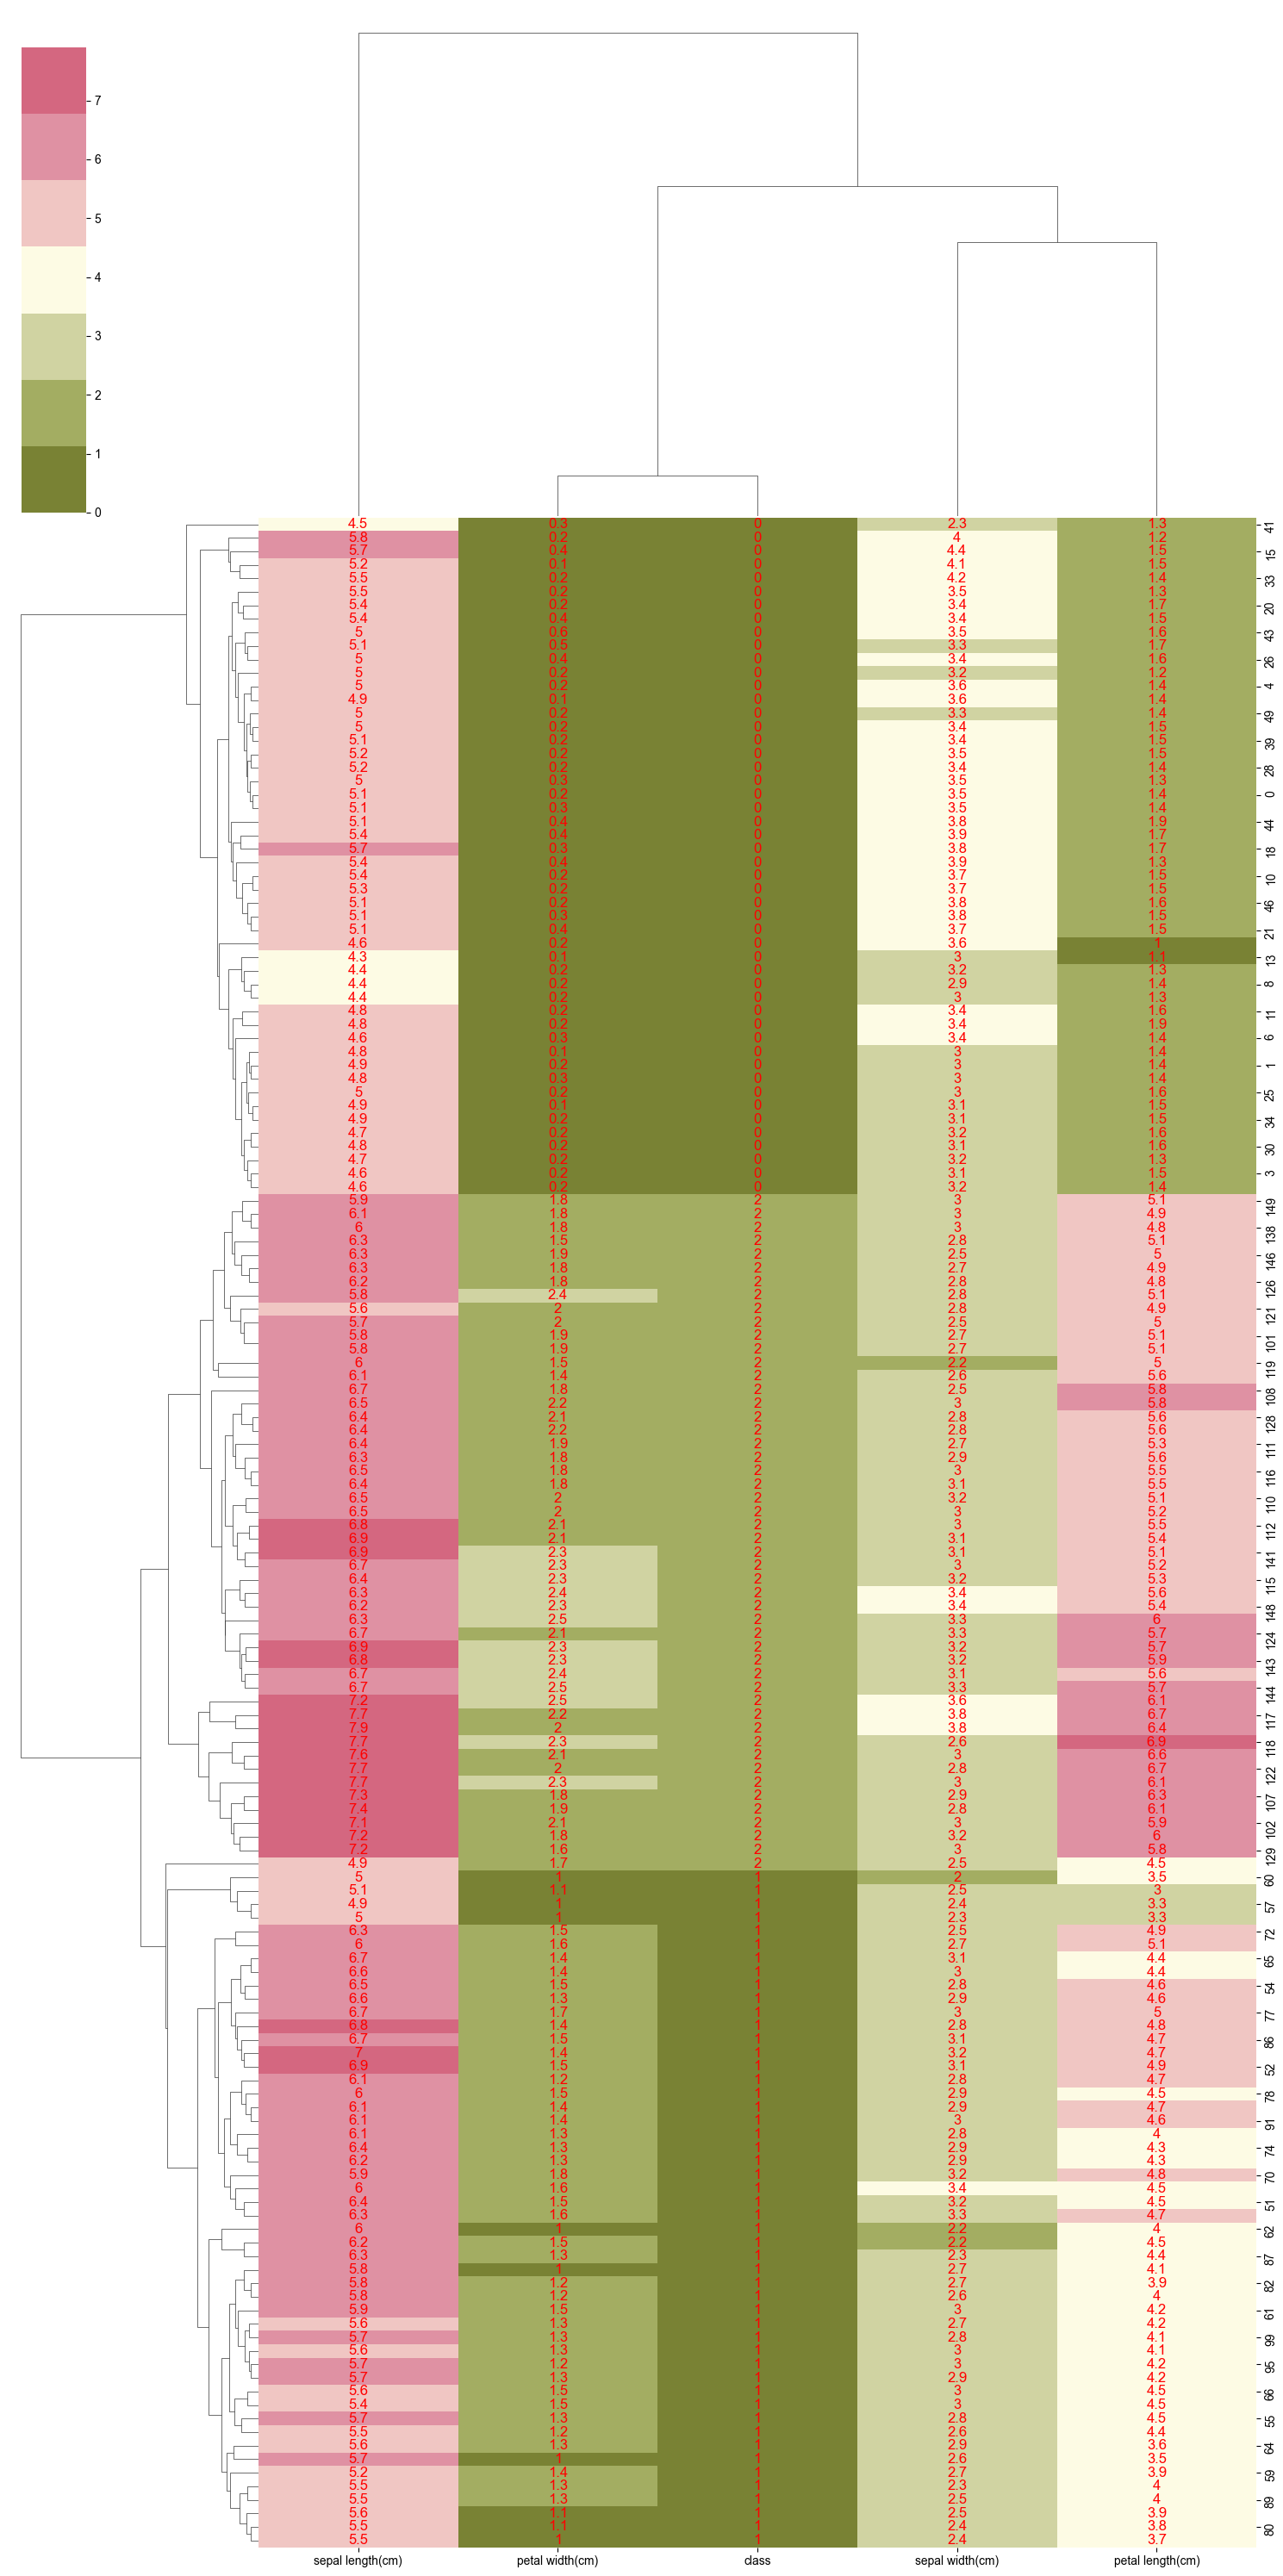

In [17]:
"""
3.12 cmap：热图填充色colormap设置
colormap设置参考：python中colormap详细设置
3.13 annot、annot_kws：显示文本、文本属性设置
"""
sns.clustermap(data=pd_iris,
               annot=True,#默认为False，当为True时，在每个格子写入data中数据
               figsize=(15, 30),#热图宽和高
               annot_kws={'size':12,'weight':'normal', 'color':'red'},#设置格子中文本的大小、粗细、颜色
               cmap=palettable.cartocolors.diverging.ArmyRose_7.mpl_colors,
              )
sns.set(font_scale=1.5)#热图及color bar中刻度标签值字号

In [ ]:
"""
3.14 其它参数设置
普通heatmap中方法 ：heatmap关键参数详解

4、seaborn.clustermap所有参数详解代码
感兴趣可以关注公众号免费获取。

5、参考资料
http://seaborn.pydata.org/examples/structured_heatmap.html
http://seaborn.pydata.org/generated/seaborn.clustermap.html#seaborn.clustermap
本篇结束，下一篇介绍相关性热图。
"""